#### Task 1.1 Define a problem

#### Define an image classification problem that may help people better recycle, particularly by reducing contamination.

Recycling contamination refers to the activity in which materials are sorted in the wrong bin. For example , 
throwing food waste, e-waste such as batteires in the recycling bin. Putting recycle items such as cardboard 
or plastic jar into non-recyclable bin convert them into trash. So, whole effort of recycling gets wasted.

#### Describe the desired inputs and outputs, including the target classes.

The inputs would be images of recyclable item such as cardboard, paper, plastic, metal and non-recyclable items
such as e-waste, batteries, polystrene etc.

#### Task 1.2 Make a plan
#### What dataset can you use to develop a deep learning solution?

I have used a manually downloaded images from google and created the dataset. I have created two folders for Recyclable
and non-recyclable images. Recyclable images consist of cardborad, paper, platic jars, glass jars. Non-Recyclable images
consists of e-waste, batteries, polysetrene, bulbs, plastic bags.

#### How many images do you need? How many for training? How many for testing?

There are aroud 4725 images. 70 % of them are used for training, 20 % for validation and 10 % for testing. 
The images used for testing are new images which are not seen by model while training.

#### Do you need to label the images yourself?

No, there is no need to label images. I have just created two folders of Recyclable and Non-Recyclable images.After thatused image_from_dataset function which was able to recognise two folders and created separated batches 
from the images.

#### How do you determine if your model is good enough?

We test its accuracy and loss by testing the model on test data which the model has not seen while training.

#### Task 1.3 Implement a solution
#### Collect relevant data.

#### Installing dependent libraries and modules

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Setting path of the directory

In [7]:
data_dir = '/Users/arjodh_singh/Downloads/Waste-Classification'
data_dir

'/Users/arjodh_singh/Downloads/Waste-Classification'

#### Defining image types

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [27]:
%cd /Users/arjodh_singh/Downloads/Waste-Classification
%rm .DS_Store


/Users/arjodh_singh/Downloads/Waste-Classification


#### Querying the directory to verify two folders

In [28]:
os.listdir(data_dir)

['Non-Recyclable', 'Recyclable']

#### Creating dataset by using function:image_dataset_from_directory which recognise two classes in the dataset and
#### split the data into 32 images per batch of size (256,256)

In [30]:
data = tf.keras.utils.image_dataset_from_directory(directory='/Users/arjodh_singh/Downloads/Waste-Classification')
data

Found 4725 files belonging to 2 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

#### Iterating over the data

In [31]:
data_iterator = data.as_numpy_iterator()

In [32]:
batch = data_iterator.next()

#### Visualising the data

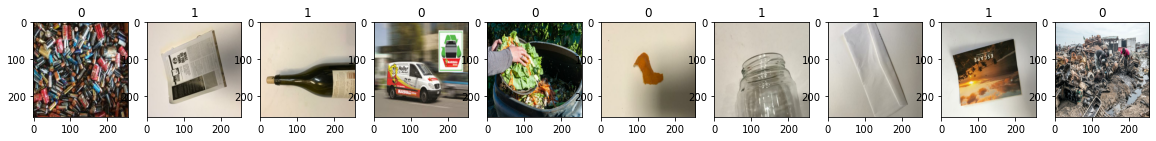

In [33]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#### Rescaling the images

In [34]:
data = data.map(lambda x,y: (x/255, y))
len(data)

148

#### Defining the size of train, validate and test data

In [35]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [36]:
train_size

103

In [37]:
val_size

29

In [38]:
test_size

14

#### Creating train data with 70% of the data. 
#### Creating validation data with next 20% of data by skipping the first 70% data.
#### Similarly test data is created with remaining 10 % of unseen data for the model.

In [39]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#### Develop a deep learning model.

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [41]:
model = Sequential()

In [42]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [45]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
103/103 [==============================] - 58s 548ms/step - loss: 0.6245 - accuracy: 0.6429 - val_loss: 0.5214 - val_accuracy: 0.7414
Epoch 2/10
103/103 [==============================] - 100s 970ms/step - loss: 0.4639 - accuracy: 0.7718 - val_loss: 0.4193 - val_accuracy: 0.7866
Epoch 3/10
103/103 [==============================] - 75s 716ms/step - loss: 0.3491 - accuracy: 0.8368 - val_loss: 0.3102 - val_accuracy: 0.8685
Epoch 4/10
103/103 [==============================] - 71s 683ms/step - loss: 0.2221 - accuracy: 0.9026 - val_loss: 0.1793 - val_accuracy: 0.9224
Epoch 5/10
103/103 [==============================] - 65s 627ms/step - loss: 0.1367 - accuracy: 0.9478 - val_loss: 0.2678 - val_accuracy: 0.8955
Epoch 6/10
103/103 [==============================] - 67s 638ms/step - loss: 0.1131 - accuracy: 0.9578 - val_loss: 0.1215 - val_accuracy: 0.9429
Epoch 7/10
103/103 [==============================] - 69s 663ms/step - loss: 0.0809 - accuracy: 0.9660 - val_loss: 0.1294 - val_a

#### Report the model performance against the success criteria that you define.

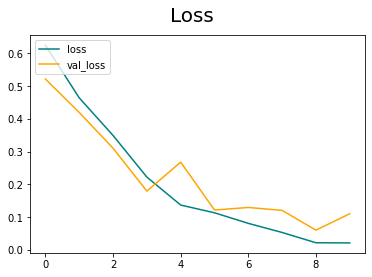

In [46]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

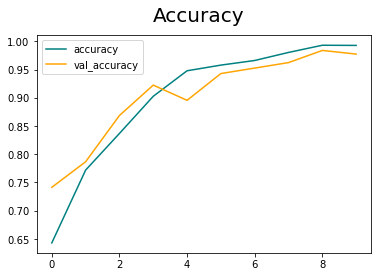

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [48]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [49]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [50]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 113ms/step


In [51]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()},Accuracy:{ acc.result().numpy()}')

Precision:0.9819819927215576, Recall:0.9519650936126709,Accuracy:0.9665178656578064


#### Model is having any accuarcy of 96.65 % on the unseen testing data.

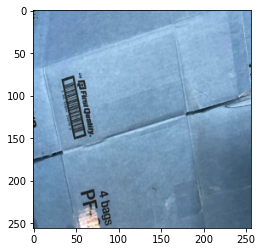

In [53]:
import cv2
test_img = cv2.imread("/Users/arjodh_singh/Downloads/Waste-Classification/Recyclable/cardboard45.jpg")
resize = tf.image.resize(test_img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [54]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 83ms/step


array([[0.9945494]], dtype=float32)

In [55]:
if yhat > 0.5: 
    print(f'Predicted class is Recyclable')
else:
    print(f'Predicted class is Non-Recyclable')

Predicted class is Recyclable


#### Save the model

In [57]:
model.save(os.path.join('/Users/arjodh_singh/Downloads','Waste_Classifier.h5'))

#### Task 2 (C Task) Analyse and improve the model

In [58]:
data_dir_train = '/Users/arjodh_singh/Downloads/Waste-Classification2/Train'
data_dir_train

'/Users/arjodh_singh/Downloads/Waste-Classification2/Train'

In [59]:
data_dir_test = '/Users/arjodh_singh/Downloads/Waste-Classification2/Test'
data_dir_test

'/Users/arjodh_singh/Downloads/Waste-Classification2/Test'

#### Task 2.1 Build an input pipeline for data augmentation

In [60]:
train_datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness


In [61]:
test_datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness

In [62]:
train_generator = train_datagen.flow_from_directory(
                  directory=data_dir_train,
                  target_size=(256, 256), # resize to this size
                  color_mode="rgb", # for coloured images
                  batch_size=32, # number of images to extract from folder for every batch
                  class_mode="binary", # classes to predict
                  seed=2020 # to make the result reproducible
                  )

Found 3887 images belonging to 2 classes.


In [63]:
test_generator = test_datagen.flow_from_directory(
        data_dir_test, 
        target_size= (256,256),
        batch_size = 32,
        color_mode= "rgb",
        class_mode="binary")

Found 838 images belonging to 2 classes.


In [64]:
model2 = Sequential()
model2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model2.add(MaxPooling2D())
model2.add(Conv2D(32, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(16, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))


In [65]:
model2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [66]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [67]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist2 = model2.fit(train_generator,epochs=10,validation_data = test_generator,callbacks=[tensorboard_callback])

Epoch 1/10
122/122 [==============================] - 104s 845ms/step - loss: 6.5276 - accuracy: 0.6666 - val_loss: 0.5793 - val_accuracy: 0.7136
Epoch 2/10
122/122 [==============================] - 107s 880ms/step - loss: 0.5622 - accuracy: 0.7134 - val_loss: 0.5380 - val_accuracy: 0.7232
Epoch 3/10
122/122 [==============================] - 111s 909ms/step - loss: 0.5446 - accuracy: 0.7276 - val_loss: 0.5722 - val_accuracy: 0.6981
Epoch 4/10
122/122 [==============================] - 114s 934ms/step - loss: 0.5209 - accuracy: 0.7378 - val_loss: 0.5007 - val_accuracy: 0.7458
Epoch 5/10
122/122 [==============================] - 114s 933ms/step - loss: 0.5000 - accuracy: 0.7538 - val_loss: 0.5079 - val_accuracy: 0.7446
Epoch 6/10
122/122 [==============================] - 118s 963ms/step - loss: 0.4972 - accuracy: 0.7548 - val_loss: 0.4760 - val_accuracy: 0.7745
Epoch 7/10
122/122 [==============================] - 114s 934ms/step - loss: 0.4840 - accuracy: 0.7672 - val_loss: 0.5016 -

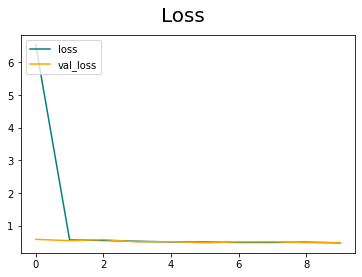

In [68]:
fig = plt.figure()
plt.plot(hist2.history['loss'], color='teal', label='loss')
plt.plot(hist2.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

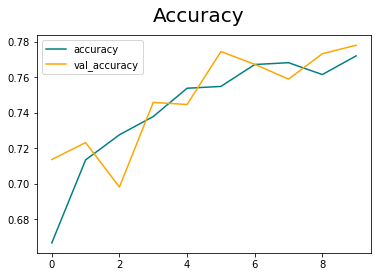

In [69]:
fig = plt.figure()
plt.plot(hist2.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist2.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()